**NGUYỄN HỮU THUẬN 19146400_TIEN**

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras.optimizers import RMSprop, SGD, Adam
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
train_dataset=train.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TIEN/train/train',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')
validation_dataset=validation.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/TIEN/train/validation',target_size=(150,150),
                                        batch_size=3,class_mode='categorical')

Found 180 images belonging to 6 classes.
Found 180 images belonging to 6 classes.


In [ ]:
train_dataset.class_indices

{'10k': 0, '1k': 1, '20k': 2, '2k': 3, '50k': 4, '5k': 5}

In [ ]:
#tạo model
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 128)               5

In [ ]:
#tao modle
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(), metrics=["accuracy"])
from keras.callbacks import EarlyStopping
 
#train 
history = model.fit(train_dataset,epochs=20,
                    validation_data = validation_dataset,
                    callbacks=[EarlyStopping(monitor='val_loss',patience=10)], verbose=1)      

Epoch 1/20
60/60 [==============================] - 14s 224ms/step - loss: 13.0672 - accuracy: 0.3167 - val_loss: 3.9423 - val_accuracy: 0.2278
Epoch 2/20
60/60 [==============================] - 12s 202ms/step - loss: 2.1190 - accuracy: 0.6056 - val_loss: 1.6905 - val_accuracy: 0.5833
Epoch 3/20
60/60 [==============================] - 12s 203ms/step - loss: 1.5357 - accuracy: 0.7722 - val_loss: 2.6478 - val_accuracy: 0.5222
Epoch 4/20
60/60 [==============================] - 12s 203ms/step - loss: 0.3008 - accuracy: 0.9500 - val_loss: 11.0514 - val_accuracy: 0.3056
Epoch 5/20
60/60 [==============================] - 12s 206ms/step - loss: 1.1418 - accuracy: 0.8833 - val_loss: 3.5634 - val_accuracy: 0.5611
Epoch 6/20
60/60 [==============================] - 12s 200ms/step - loss: 6.4428e-04 - accuracy: 1.0000 - val_loss: 4.1286 - val_accuracy: 0.5500
Epoch 7/20
60/60 [==============================] - 13s 211ms/step - loss: 0.8620 - accuracy: 0.9611 - val_loss: 5.7596 - val_accuracy: 

In [ ]:
model.save('CNNTIEN_Recognition.h5')

Sai số kiểm tra là:  6.185598373413086
Độ chính xác kiểm tra là:  0.5555555820465088


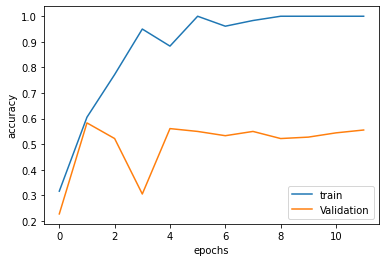

In [ ]:
# ve do thi
score = model.evaluate(validation_dataset,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [6]:
from tensorflow import keras
model = keras.models.load_model('/content/CNNTIEN_Recognition.h5')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 37, 37, 32)       0         
 g2D)                                                            
                                                                 
 flatten_10 (Flatten)        (None, 43808)             0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [4]:
classes = validation_dataset.class_indices

classes = list(classes.keys())

classes

['10k', '1k', '20k', '2k', '50k', '5k']

tiền [2]


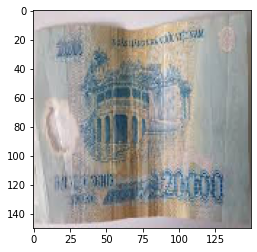

In [18]:
img_path = '/content/drive/MyDrive/Colab Notebooks/TIEN/test/20k (63).jpg'

img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255

trai=np.argmax(model.predict(img),axis=1)
pred = model.predict(img)
print("tiền",+trai)
